<a href="https://colab.research.google.com/github/anahitaoladan/Fundamental-Intelligent/blob/main/%D9%BE%D8%B1%D9%88%DA%98%D9%87_%DB%8C_%D9%86%D9%87%D8%A7%DB%8C%DB%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

پیش پردازش داده ها

In [2]:
import gdown

url = "https://drive.google.com/uc?id=1vV6gObivL9NbY6IcR51G5Xz6FRBket3S"
gdown.download(url, "breast_cancer_wisconsin_diagnostic.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1vV6gObivL9NbY6IcR51G5Xz6FRBket3S
To: /content/breast_cancer_wisconsin_diagnostic.csv
100%|██████████| 125k/125k [00:00<00:00, 3.71MB/s]


'breast_cancer_wisconsin_diagnostic.csv'

In [3]:
import pandas as pd

df = pd.read_csv("breast_cancer_wisconsin_diagnostic.csv")

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant



 Min-Max Normalization Effect 
Min value before scaling: 0.0
Max value before scaling: 4254.0
Min value after scaling: 0.0
Max value after scaling: 1.0000000000000002


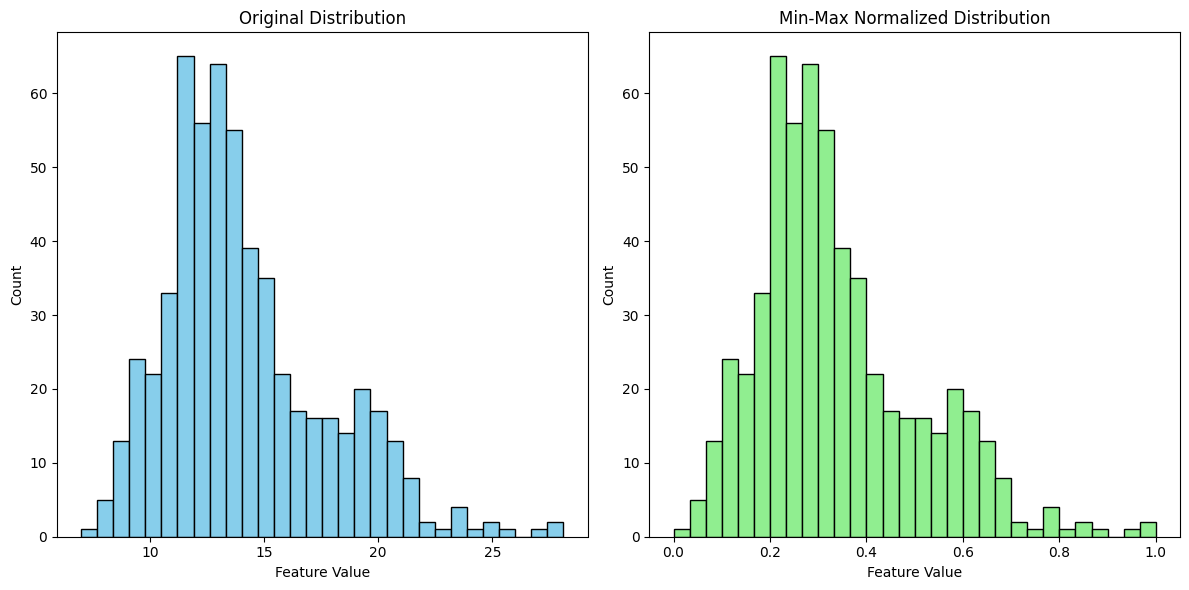


Standardization Effect
Mean value before scaling: 61.89071233951963
Std value before scaling: 34.90471860323656
Mean value after scaling: -6.795319368063057e-17
Std value after scaling: 1.000879894582902


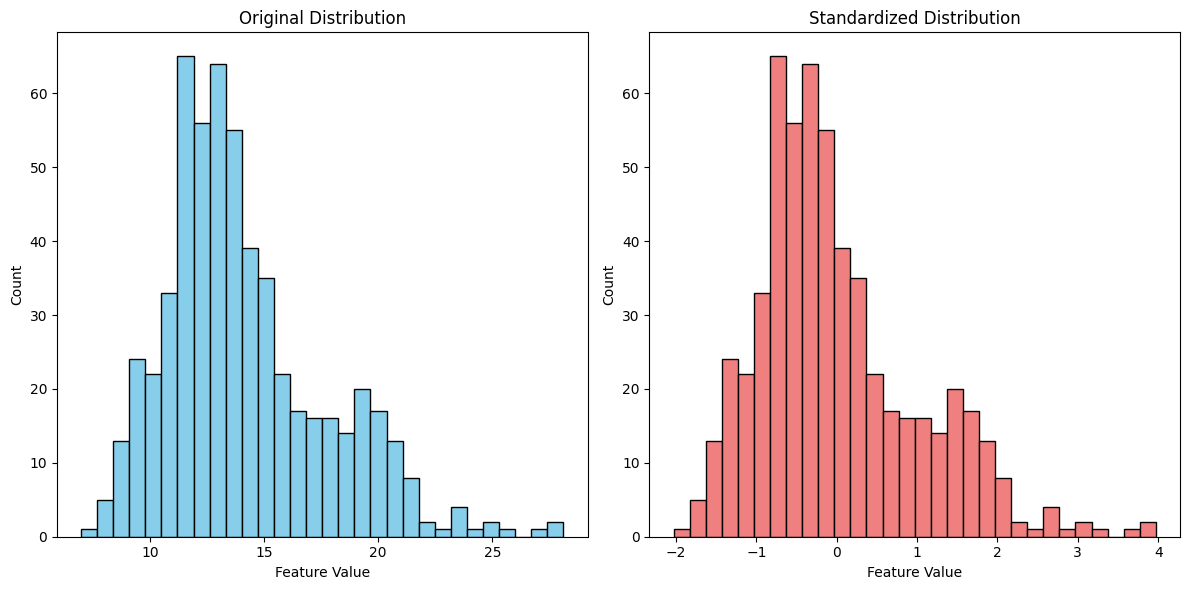


Missing Values Report
Total missing values: 0
No missing values found.

 Outlier Report (IQR) 
Top 10 features with most outliers:
area error                 65
radius error               38
perimeter error            38
worst area                 35
smoothness error           30
fractal dimension error    28
compactness error          28
symmetry error             27
mean area                  25
worst fractal dimension    24
dtype: int64
Rows with at least one outlier: 171
Shape before removing outliers: (569, 31)
Shape after removing outliers: (398, 31)

Preprocessed files saved:
- breast_cancer_minmax.csv
- breast_cancer_standardized.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv("breast_cancer_wisconsin_diagnostic.csv")

df["target"] = df["target"].map({"malignant": 1, "benign": 0})

X = df.drop(columns=["target"])
y = df["target"]

mm_scaler = MinMaxScaler()
X_minmax = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)

print("\n Min-Max Normalization Effect ")
print(f"Min value before scaling: {X.min().min()}")
print(f"Max value before scaling: {X.max().max()}")
print(f"Min value after scaling: {X_minmax.min().min()}")
print(f"Max value after scaling: {X_minmax.max().max()}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X.iloc[:, 0], bins=30, color='skyblue', edgecolor='black')  # اصلاح شده با iloc
plt.title('Original Distribution')
plt.xlabel('Feature Value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(X_minmax.iloc[:, 0], bins=30, color='lightgreen', edgecolor='black')  # اصلاح شده با iloc
plt.title('Min-Max Normalized Distribution')
plt.xlabel('Feature Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


std_scaler = StandardScaler()
X_std = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

print("\nStandardization Effect")
print(f"Mean value before scaling: {X.mean().mean()}")
print(f"Std value before scaling: {X.std().mean()}")
print(f"Mean value after scaling: {X_std.mean().mean()}")
print(f"Std value after scaling: {X_std.std().mean()}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X.iloc[:, 0], bins=30, color='skyblue', edgecolor='black')  # اصلاح شده با iloc
plt.title('Original Distribution')
plt.xlabel('Feature Value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(X_std.iloc[:, 0], bins=30, color='lightcoral', edgecolor='black')  # اصلاح شده با iloc
plt.title('Standardized Distribution')
plt.xlabel('Feature Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

missing_counts = X.isna().sum()
print("\nMissing Values Report")
print(f"Total missing values: {missing_counts.sum()}")

if missing_counts.sum() > 0:
    print(f"Missing values per feature:\n{missing_counts}")
else:
    print("No missing values found.")

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_mask = (X < lower) | (X > upper)
outliers_per_feature = outlier_mask.sum().sort_values(ascending=False)
outliers_per_row = outlier_mask.sum(axis=1)

print("\n Outlier Report (IQR) ")
print(f"Top 10 features with most outliers:\n{outliers_per_feature.head(10)}")
print(f"Rows with at least one outlier: {int((outliers_per_row > 0).sum())}")

df_no_outliers = df[~((X < lower) | (X > upper)).any(axis=1)]
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")


df_minmax = pd.concat([X_minmax, y], axis=1)
df_std = pd.concat([X_std, y], axis=1)

df_minmax.to_csv("breast_cancer_minmax.csv", index=False)
df_std.to_csv("breast_cancer_standardized.csv", index=False)

print("\nPreprocessed files saved:")
print("- breast_cancer_minmax.csv")
print("- breast_cancer_standardized.csv")

بخش دوم-کاهش ابعاد

In [11]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

df_minmax = pd.read_csv("/content/breast_cancer_minmax.csv")
df_std = pd.read_csv("/content/breast_cancer_standardized.csv")

X_minmax = df_minmax.drop(columns=["target"])
y_minmax = df_minmax["target"]

X_std = df_std.drop(columns=["target"])
y_std = df_std["target"]

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_minmax, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

n_features = X_train.shape[1]
n_classes = len(set(y_train))

n_components_lda = min(n_features, n_classes - 1)

lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

def evaluate_model(X_train_data, X_test_data, y_train_data, y_test_data):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    start_time = time.time()
    model.fit(X_train_data, y_train_data)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test_data)
    pred_time = time.time() - start_time

    accuracy = accuracy_score(y_test_data, y_pred)
    return accuracy, train_time, pred_time

accuracy_original, train_time_original, pred_time_original = evaluate_model(X_train, X_test, y_train, y_test)
accuracy_pca, train_time_pca, pred_time_pca = evaluate_model(X_train_pca, X_test_pca, y_train, y_test)
accuracy_lda, train_time_lda, pred_time_lda = evaluate_model(X_train_lda, X_test_lda, y_train, y_test)

print(f"Original Data: Accuracy = {accuracy_original:.4f}, Training Time = {train_time_original:.4f}s, Prediction Time = {pred_time_original:.4f}s")
print(f"PCA Data: Accuracy = {accuracy_pca:.4f}, Training Time = {train_time_pca:.4f}s, Prediction Time = {pred_time_pca:.4f}s")
print(f"LDA Data: Accuracy = {accuracy_lda:.4f}, Training Time = {train_time_lda:.4f}s, Prediction Time = {pred_time_lda:.4f}s")

Original Data: Accuracy = 0.9649, Training Time = 0.8994s, Prediction Time = 0.0188s
PCA Data: Accuracy = 0.9737, Training Time = 0.6687s, Prediction Time = 0.0135s
LDA Data: Accuracy = 0.9474, Training Time = 0.5530s, Prediction Time = 0.0281s


بخش سوم-انتخاب و آموزش مدل ها

مدل جنگل تصادفی

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
model_rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Training Time: {train_time_rf:.4f}s")

Random Forest - Accuracy: 0.9649, Training Time: 0.3304s


مدل SVM

In [13]:
from sklearn.svm import SVC

model_svm = SVC(random_state=42)

start_time = time.time()
model_svm.fit(X_train, y_train)
train_time_svm = time.time() - start_time

y_pred_svm = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM - Accuracy: {accuracy_svm:.4f}, Training Time: {train_time_svm:.4f}s")

SVM - Accuracy: 0.9737, Training Time: 0.0155s


بخش چهارم-تنظیم هایپرپارامتر ها

برای جنگل تصادفی

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

y_pred_rf_best = grid_search_rf.best_estimator_.predict(X_test)

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

print(f"Random Forest (Best Params) - Accuracy: {accuracy_rf_best:.4f}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest (Best Params) - Accuracy: 0.9649


برای SVM

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_svm, cv=3, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)

y_pred_svm_best = grid_search_svm.best_estimator_.predict(X_test)

accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)

print(f"SVM (Best Params) - Accuracy: {accuracy_svm_best:.4f}")

Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM (Best Params) - Accuracy: 0.9737


بخش پنچم-وزن دهی

برای جنگل تصادفی

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

start_time = time.time()
model_rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest (With Class Weight) - Accuracy: {accuracy_rf:.4f}, Training Time: {train_time_rf:.4f}s")

Random Forest (With Class Weight) - Accuracy: 0.9649, Training Time: 1.2177s


برای SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

model_svm = SVC(random_state=42, class_weight='balanced')

start_time = time.time()
model_svm.fit(X_train, y_train)
train_time_svm = time.time() - start_time

y_pred_svm = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM (With Class Weight) - Accuracy: {accuracy_svm:.4f}, Training Time: {train_time_svm:.4f}s")

SVM (With Class Weight) - Accuracy: 0.9737, Training Time: 0.0322s


بخش پنجم-تفکیک داده ها

جنگل تصادفی

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

start_time = time.time()
model_rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Training Time: {train_time_rf:.4f}s")

Random Forest - Accuracy: 0.9649, Training Time: 0.5320s


مدل SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model_svm = SVC(random_state=42, class_weight='balanced')

start_time = time.time()
model_svm.fit(X_train, y_train)
train_time_svm = time.time() - start_time

y_pred_svm = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM - Accuracy: {accuracy_svm:.4f}, Training Time: {train_time_svm:.4f}s")

بخش ششم-مقایسه ی دو روش گفته شده از طریق F1-score و ROC

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

model_svm = SVC(random_state=42, probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:, 1])

f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])

print(f"Decision Tree - F1-Score: {f1_dt:.4f}, ROC-AUC: {roc_auc_dt:.4f}")
print(f"SVM - F1-Score: {f1_svm:.4f}, ROC-AUC: {roc_auc_svm:.4f}")

Decision Tree - F1-Score: 0.9302, ROC-AUC: 0.9440
SVM - F1-Score: 0.9250, ROC-AUC: 0.9934


رسم نمودار های ممکن

In [ ]:
رسم Confusion matrix

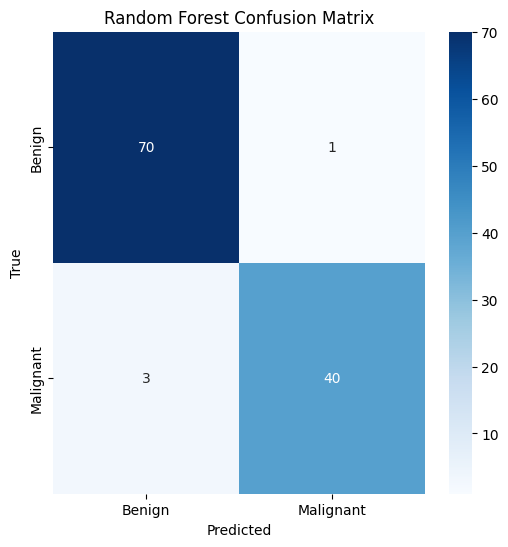

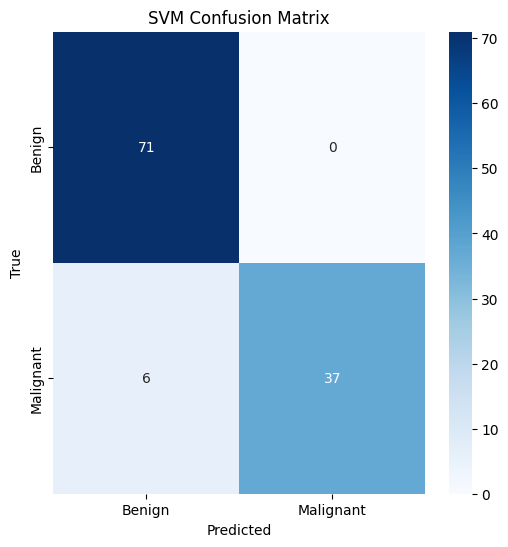

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

رسم Learning curve

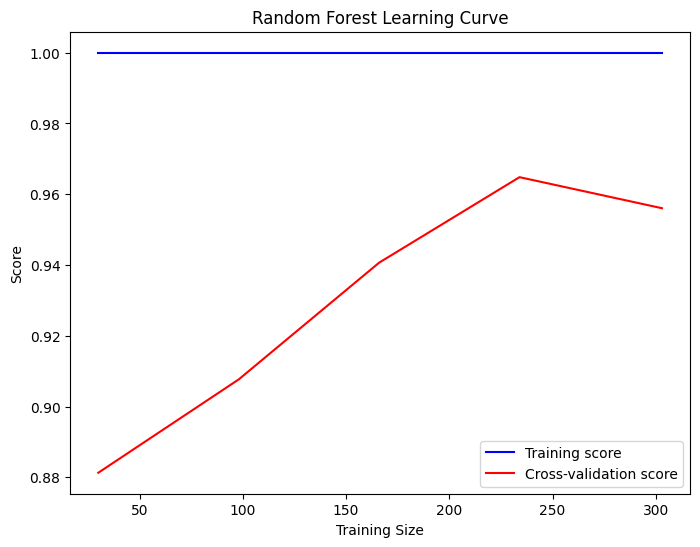

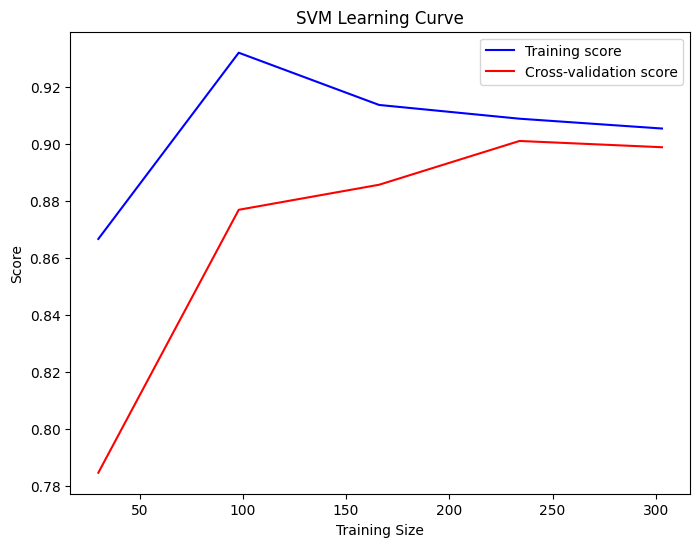

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model_rf, X_train, y_train, cv=3, n_jobs=-1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score', color='red')
plt.title("Random Forest Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(model_svm, X_train, y_train, cv=3, n_jobs=-1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_svm, train_scores_svm.mean(axis=1), label='Training score', color='blue')
plt.plot(train_sizes_svm, test_scores_svm.mean(axis=1), label='Cross-validation score', color='red')
plt.title("SVM Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

رسم ROC Curve

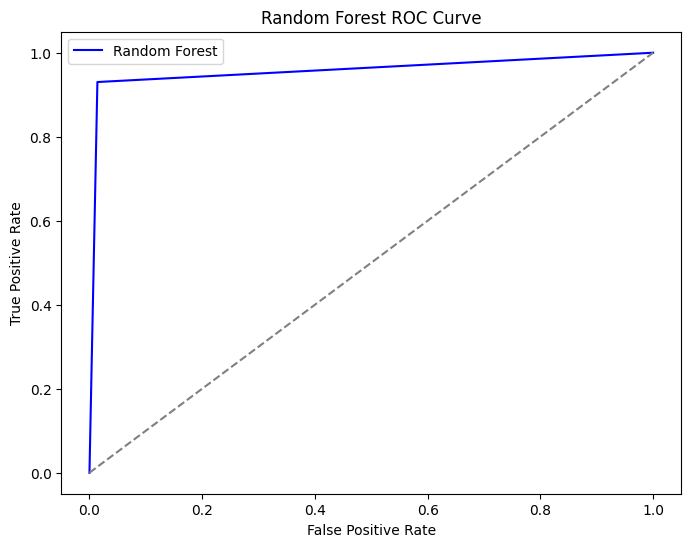

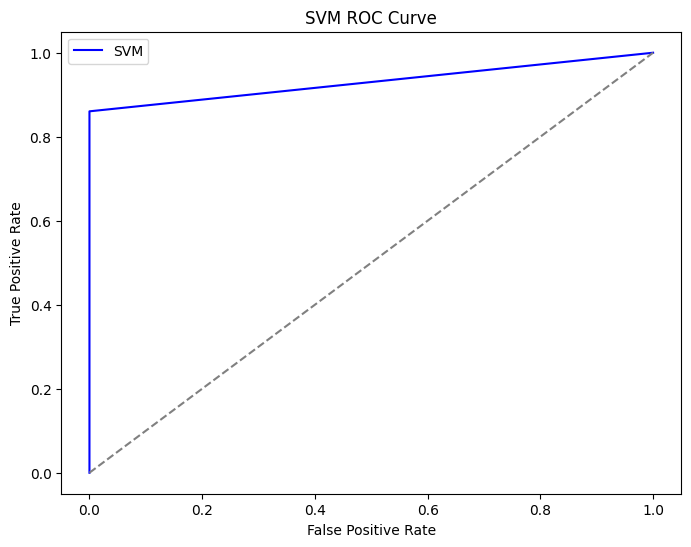

In [28]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # خط تصادفی
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label='SVM')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # خط تصادفی
plt.title("SVM ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()